In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
mean_squared_error, mean_absolute_error, r2_score,
accuracy_score, precision_score, recall_score, f1_score,
classification_report, confusion_matrix
)
from math import sqrt

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import joblib

In [11]:
# === 2. Load Data ===
df = pd.read_csv("/content/StudentsPerformance.csv")
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

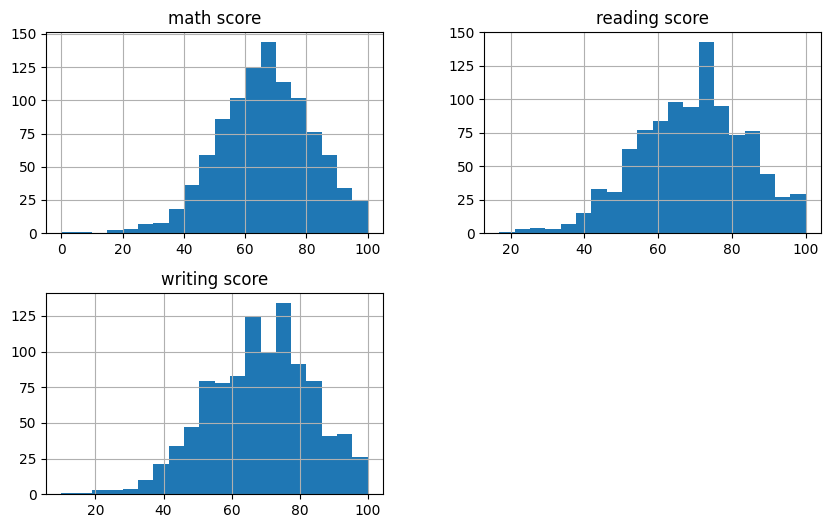

In [13]:
# Score distributions
df[['math score','reading score','writing score']].hist(bins=20, figsize=(10,6))
plt.show()

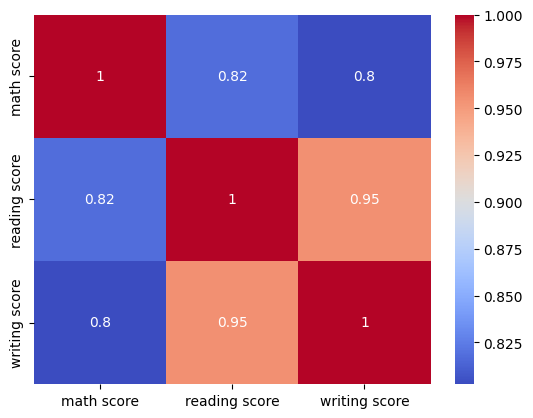

In [14]:
# Correlation
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap="coolwarm")
plt.show()

In [15]:
# === 4. Feature Engineering ===
# Classification target: pass/fail in math
df['math_pass'] = (df['math score'] >= 60).astype(int)


features_regression = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score','writing score']
target_regression = 'math score'


features_classification = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score','writing score']
target_classification = 'math_pass'

In [16]:
# === 5. Train/Test Split ===
Xr = df[features_regression]
yr = df[target_regression]


Xc = df[features_classification]
yc = df[target_classification]


Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, stratify=yc, random_state=42)

In [17]:
# === 6. Preprocessing ===
numeric_features = ['reading score','writing score']
categorical_features = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)
])

In [18]:
# === 7. Regression Model ===
reg_model = Pipeline(steps=[('preprocessor', preprocessor),
('regressor', RandomForestRegressor(n_estimators=200, random_state=42))])


reg_model.fit(Xr_train, yr_train)
yr_pred = reg_model.predict(Xr_test)


rmse = sqrt(mean_squared_error(yr_test, yr_pred))
print("Regression Results")
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(yr_test, yr_pred))
print("R2:", r2_score(yr_test, yr_pred))

Regression Results
RMSE: 5.9691399614482155
MAE: 4.6333
R2: 0.8535757945340399


Classification Results
Accuracy: 0.875
Precision: 0.8873239436619719
Recall: 0.9333333333333333
F1: 0.9097472924187726

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.80        65
           1       0.89      0.93      0.91       135

    accuracy                           0.88       200
   macro avg       0.87      0.84      0.85       200
weighted avg       0.87      0.88      0.87       200



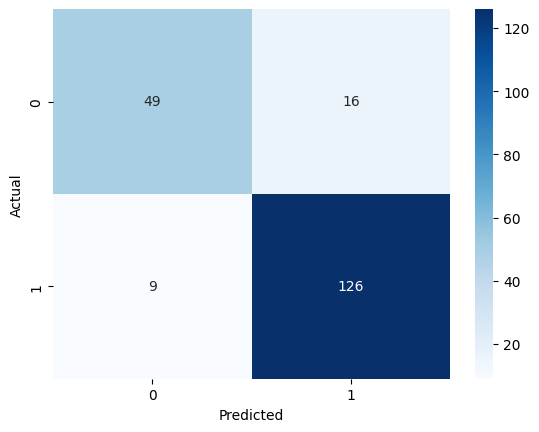

In [19]:
# === 8. Classification Model ===
clf_model = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', RandomForestClassifier(n_estimators=200, random_state=42))])


clf_model.fit(Xc_train, yc_train)
yc_pred = clf_model.predict(Xc_test)


print("Classification Results")
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Precision:", precision_score(yc_test, yc_pred))
print("Recall:", recall_score(yc_test, yc_pred))
print("F1:", f1_score(yc_test, yc_pred))


print("\nClassification Report:\n", classification_report(yc_test, yc_pred))

sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()